In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense,Embedding
import matplotlib.pyplot as plt

In [2]:
text="hellohellohello"
chars=sorted(list(set(text)))
char_to_index={c:i for i,c in enumerate(chars)}
index_to_char={i:c for c,i in char_to_index.items()}
print("Characters:",chars)
print("char to index:",char_to_index)
print("index to char:",index_to_char)

Characters: ['e', 'h', 'l', 'o']
char to index: {'e': 0, 'h': 1, 'l': 2, 'o': 3}
index to char: {0: 'e', 1: 'h', 2: 'l', 3: 'o'}


In [3]:
seq_length=1
x=[]
y=[]
for i in range(len(text)-seq_length):
    input_seq=text[i:i+seq_length]
    target=text[i+seq_length]
    x.append([char_to_index[char] for char in input_seq])
    y.append(char_to_index[target])
x=np.array(x)
y=np.array(y)

print("X shape:",x.shape)
print("y shape:",y.shape)

X shape: (14, 1)
y shape: (14,)


In [4]:
vocab_size=len(chars)
model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=10))
model.add(SimpleRNN(units=50,return_sequences=False))
model.add(Dense(units=vocab_size,activation='softmax'))

model.build(input_shape=(None,seq_length))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 1, 10)          │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         3,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,294 (12.87 KB)

 Trainable params: 3,294 (12.87 KB)

 Non-trainable params: 0 (0.00 B)

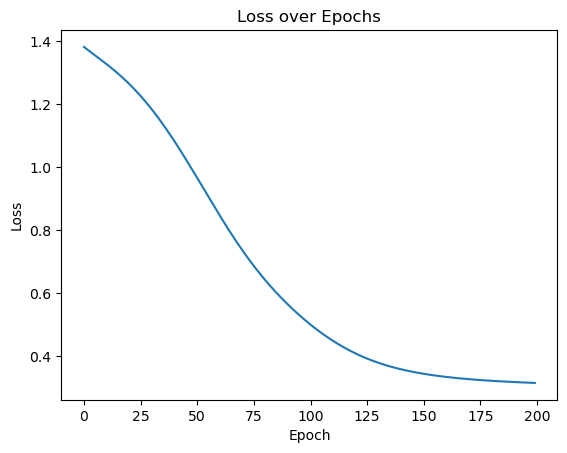

In [5]:
history=model.fit(x,y,epochs=200,verbose=0)

plt.plot(history.history['loss'])
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [6]:
def predict_next_char(input_char):
    input_idx=np.array([[char_to_index[input_char]]])
    prediction=model.predict(input_idx,verbose=0)
    predicted_index=np.argmax(prediction)
    return index_to_char[predicted_index]

start_char='e'
predicted_char=predict_next_char(start_char)
print(f"Given '{start_char}' , predicted next char: '{predicted_char}'")


Given 'e' , predicted next char: 'l'


In [7]:
def  generate_text(start_char, length=10):
    result=start_char
    current_char=start_char
    for _ in range(length):
        next_char=predict_next_char(current_char)
        result+=next_char
        current_char=next_char
    return result

print(generate_text("h",length=10))

helllllllll


In [9]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical

In [13]:
text="hellohellohello"
chars=sorted(list(set(text)))
char_to_index={c:i for i,c in enumerate(chars)}
index_to_char={i:c for c,i in char_to_index.items()}
vocab_size=len(chars)


In [26]:
seq_length=5
x=[]
y=[]

for i in range(len(text)-seq_length):
    input_seq=text[i:i+seq_length]
    target_char=text[i+seq_length]
    x.append([char_to_index[ch] for ch in input_seq])
    y.append(char_to_index[target_char])

x=np.array(x)
y=np.array(y)

In [27]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=10))
model.add(LSTM(50))
model.add(Dense(vocab_size,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.build(input_shape=(None,seq_length))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 5, 10)          │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        12,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,444 (48.61 KB)

 Trainable params: 12,444 (48.61 KB)

 Non-trainable params: 0 (0.00 B)

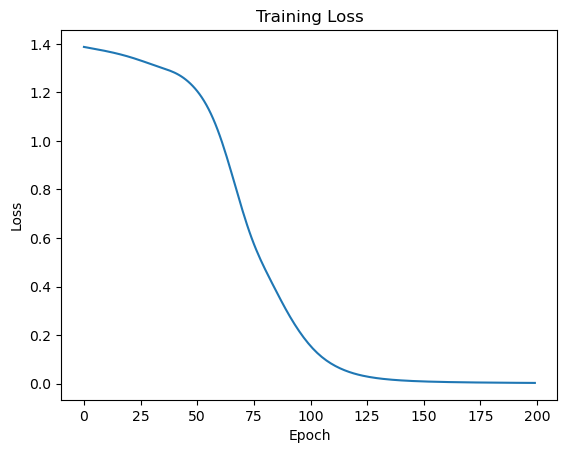

In [28]:
history=model.fit(x,y,epochs=200,verbose=0)
plt.plot(history.history['loss'])
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [29]:
def predict_next_char(input_char):
    input_idx=np.array([[char_to_index[input_char]]])
    prediction=model.predict(input_idx,verbose=0)
    predicted_index=np.argmax(prediction)
    return index_to_char[predicted_index]

start_char='h'
print(f"Given '{start_char}',predicted next char: '{predict_next_char(start_char)}'")

Given 'h',predicted next char: 'e'


In [30]:
def generate_text(start_char,length=10):
    result=start_char
    current_char=start_char
    for _ in range(length):
        next_char=predict_next_char(current_char)
        result+=next_char
        current_char=next_char
    return result
print(generate_text('h',length=10))

helhelhelhe


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 5, 10)          │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,500 (76.17 KB)

 Trainable params: 19,500 (76.17 KB)

 Non-trainable params: 0 (0.00 B)

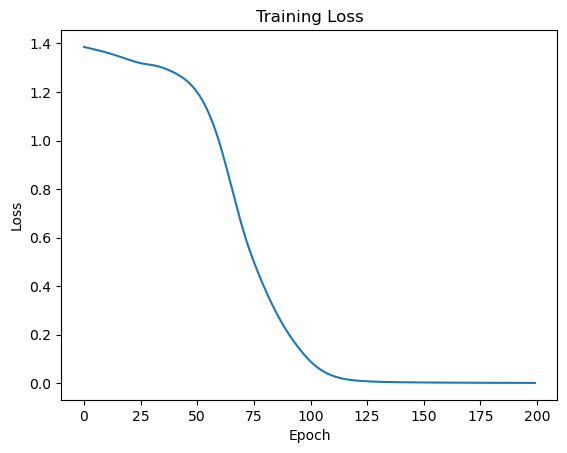

Generated text: hellohellohellohellohello


In [10]:
text="hellohellohello"
chars=sorted(list(set(text)))
char_to_index={c:i for i,c in enumerate(chars)}
index_to_char={i:c for c,i in char_to_index.items()}
vocab_size=len(chars)

seq_length=5
x=[]
y=[]

for i in range(len(text)-seq_length):
    input_seq=text[i:i+seq_length]
    target_char=text[i+seq_length]
    x.append([char_to_index[c] for c in input_seq])
    y.append(char_to_index[target_char])

x=np.array(x)
y=np.array(y)

model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=10,input_length=seq_length))
model.add(LSTM(64))
model.add(Dense(vocab_size,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.build(input_shape=(None,seq_length))
model.summary()

history=model.fit(x,y,epochs=200,verbose=0)
plt.plot(history.history['loss'])
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

def predict_next_char(sequence):
    input_idx=np.array([[char_to_index[c] for c in sequence]])
    prediction=model.predict(input_idx,verbose=0)
    predicted_index=np.argmax(prediction)
    return index_to_char[np.argmax(prediction)]



def generate_text(start_char,length=20):
    result=start_char
    current_char=start_char
    for _ in range(length):
        next_char=predict_next_char(current_char)
        result+=next_char
        current_char=result[-seq_length:]
    return result
generated=generate_text("hello",length=20)
print("Generated text:",generated)